In [1]:
# Importing Libraries

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 1. Loading and Preprocessing 

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Preview the data
print("Dataset preview:")
print(df.head())

Dataset preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [7]:
# 2. Clustering Algorithm Implementation


KMeans: KMeans clustering divides the data into k clusters by minimizing intra-cluster distances.


C:\Users\vayal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


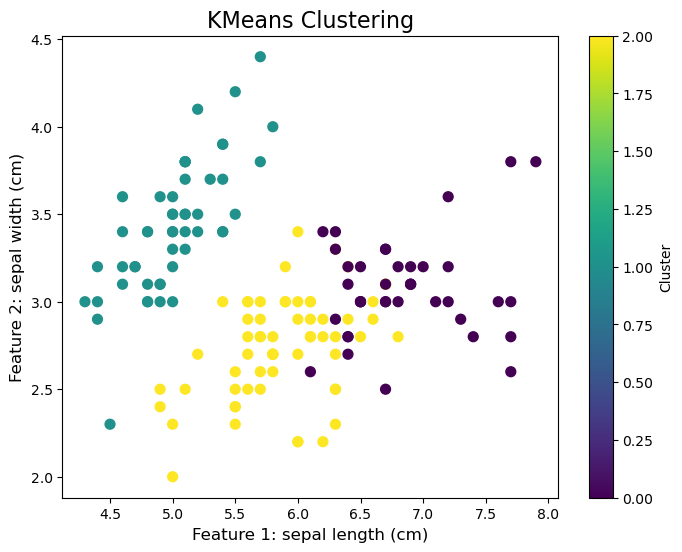

In [9]:
# (A) KMeans Clustering 

# Brief description of KMeans
print("\nKMeans: KMeans clustering divides the data into k clusters by minimizing intra-cluster distances.")

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Add cluster labels to DataFrame
df['KMeans Cluster'] = kmeans.labels_

# Visualize KMeans Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['KMeans Cluster'], cmap='viridis', s=50)
plt.title('KMeans Clustering', fontsize=16)
plt.xlabel('Feature 1: ' + iris.feature_names[0], fontsize=12)
plt.ylabel('Feature 2: ' + iris.feature_names[1], fontsize=12)
plt.colorbar(label='Cluster')
plt.show()


Hierarchical Clustering: Groups data into a hierarchy of clusters using a distance metric.


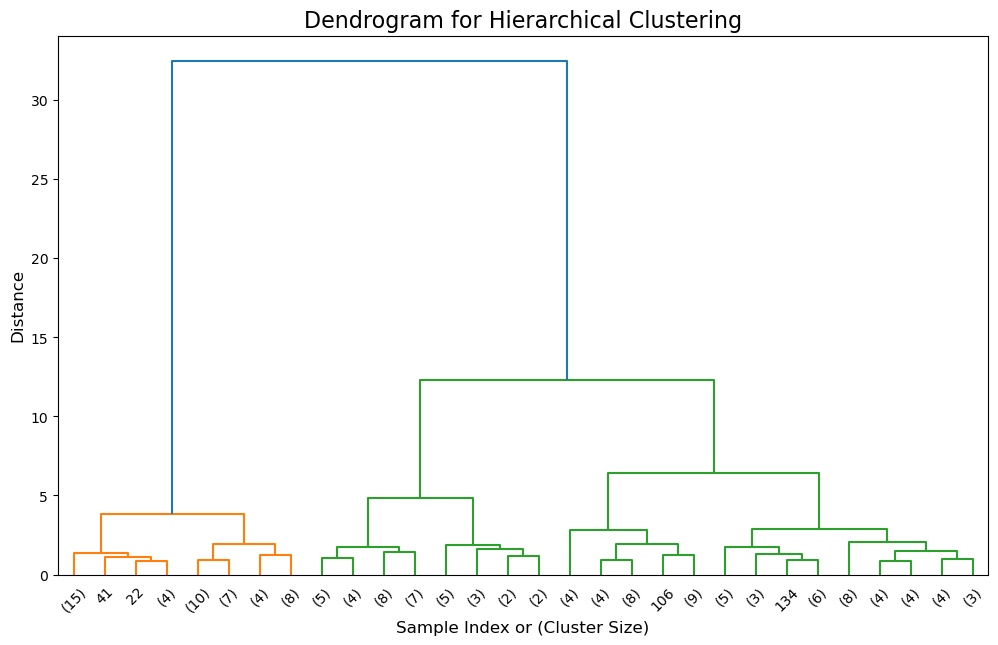

In [11]:
# (B) Hierarchical Clustering

# Brief description of Hierarchical Clustering
print("\nHierarchical Clustering: Groups data into a hierarchy of clusters using a distance metric.")

# Generate linkage matrix for hierarchical clustering
linked = linkage(df.iloc[:, :-1], method='ward')

# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(12, 7))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrogram for Hierarchical Clustering', fontsize=16)
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.show()

In [13]:
# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical Cluster'] = hierarchical.fit_predict(df.iloc[:, :-2])

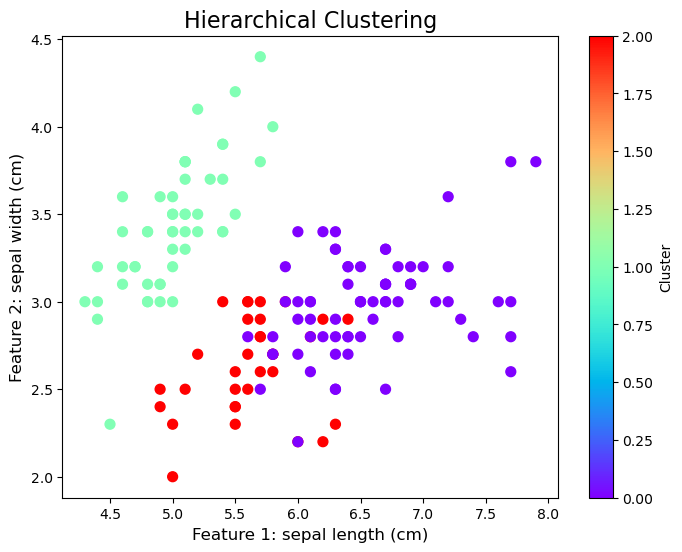

In [15]:
# Visualize Hierarchical Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Hierarchical Cluster'], cmap='rainbow', s=50)
plt.title('Hierarchical Clustering', fontsize=16)
plt.xlabel('Feature 1: ' + iris.feature_names[0], fontsize=12)
plt.ylabel('Feature 2: ' + iris.feature_names[1], fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

In [17]:
# Save the DataFrame for potential submission
df.to_csv('Iris_Clustering_Results.csv', index=False)
